# Librerías

In [1]:
#=================================
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from array import *
import scipy.stats as stats
import math
#=================================
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#=================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

# Los datos

## Carga de datos y descripción

In [2]:
df = pd.DataFrame()
X = [15.1,11.3,7.8,10.1,10.3,6.8,3.1,6.2,10.7,13.9,
              6.2,5.3,10.3,7.1,2.3,4.5,10.6,13.2,2.7,8.5,
              3.3,11.1,2.3,12.5,9.3,5,2.9,11.5,3.3,5.2,
              9.7,10.9,11.1,1.4,7.4,6.4,4.2,6.1,2.4,11.6,
              1.7,11,12.2,4.5,5.5,9.5,4.3,6.7,3,6.9]

y = [69.05,69.31,70.55,70.66,71.71,72.06,72.48,70.06,70.66,68.54,
            73.6,71.87,70.14,70.88,72.56,72.58,70.1,68.76,70.39,70.22,
            71.83,70.63,72.96,68.09,70.69,70.56,72.6,69.03,71.23,70.93,
            70.32,70.55,69.21,72.78,70.82,71.42,72.13,70.43,71.9,67.96,
            72.08,70.11,70.9,72.9,71.64,70.08,71.72,69.48,72.48,70.29]


df['X'] = X
df['y'] = y

del X, y

In [3]:
df.head()

,X,y
0,15.1,69.05
1,11.3,69.31
2,7.8,70.55
3,10.1,70.66
4,10.3,71.71


Información de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


Descripción de los datos

In [5]:
df.describe()

,X,y
count,50.00000,50.000000
mean,7.37800,70.878600
std,3.69154,1.342394
min,1.40000,67.960000
25%,4.35000,70.117500
50%,6.85000,70.675000
75%,10.67500,71.892500
max,15.10000,73.600000


## Análisis gráfico y correlación

Relación gráfica

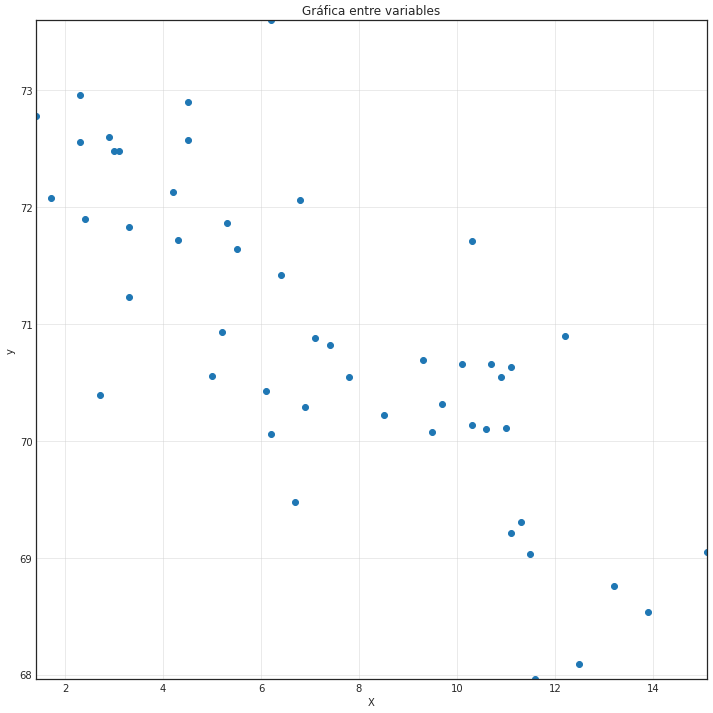

In [6]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(df['X'], df['y'])
    plt.title('Gráfica entre variables')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.ylim(min(df['y']), max(df['y']))
    plt.xlim(min(df['X']), max(df['X']))
    plt.grid(True, alpha = 0.5)
    plt.tight_layout()
plt.show()

Correlación entre variables

In [7]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [8]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,X,y,-0.780846,0.780846
2,y,X,-0.780846,0.780846


Histograma y Correlacion

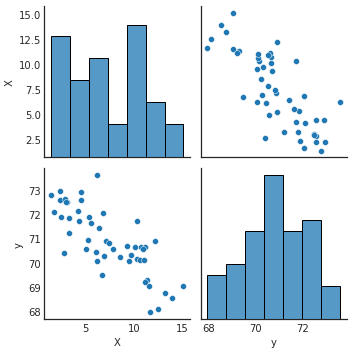

In [9]:
with plt.style.context('seaborn-white'):
    sns.pairplot(df, height=2.5)
    plt.tight_layout()
    plt.grid()
plt.show()

## Preparación de datos

In [10]:
# separar variable respuesta del dataset
y = df["y"].copy()
X = df.drop(["y"], axis=1)

Creación de conjunto de entrenamiento y de prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.90,
                                        random_state = 42,
                                        shuffle      = False)

# El modelo

## Ajuste del modelo

In [12]:
# Modelo de regresion lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Bondad de ajuste

In [13]:
#Midiendo el modelo
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
100*round(lin_rmse,4)

83.17

# Análisis de residuos

## Normalidad

In [14]:
residuos_train = y_pred - y_train

<Figure size 1440x1440 with 0 Axes>

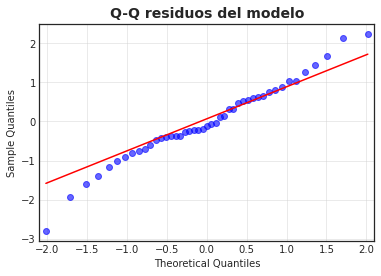

In [15]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(20, 20))

    sm.qqplot(
        residuos_train,
        fit   = True,
        line  = 'q',
        color = "blue",#'firebrick',
        alpha = 0.6,
        lw    = 2
    )

    plt.title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

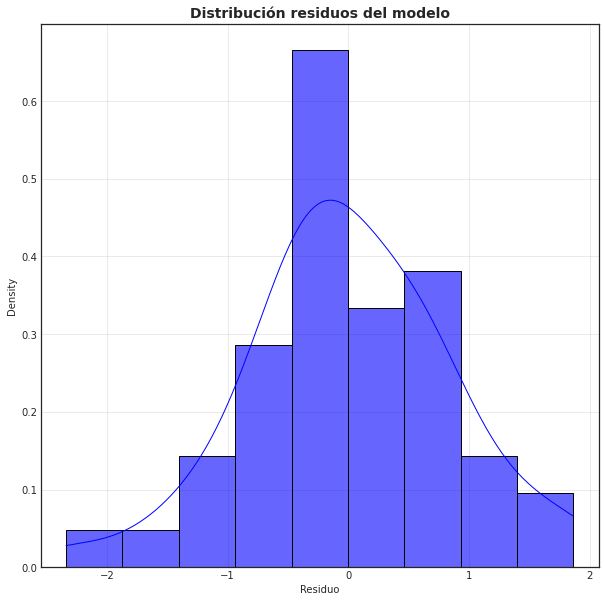

In [16]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    sns.histplot(
        data    = residuos_train,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "blue",#"firebrick",
        alpha   = 0.6
    )

    plt.title('Distribución residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [17]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
k1, p_value = stats.shapiro(residuos_train)
print(f"Shapiro test: Estadístico= {k1}, p-value = {p_value}")

Shapiro test: Estadístico= 0.9860033988952637, p-value = 0.8556928038597107


Test de Shapiro-Wilk

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

In [18]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"D'Agostino's K-squared test: Estadístico= {k2}, p-value = {p_value}")

D'Agostino's K-squared test: Estadístico= 1.3642301497495686, p-value = 0.5055465918815232


Test de D'Agostino's K-cuadrado

$H_0$: La distribución es normal

$H_1$: La distribución no es normal

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Residuos con media cero

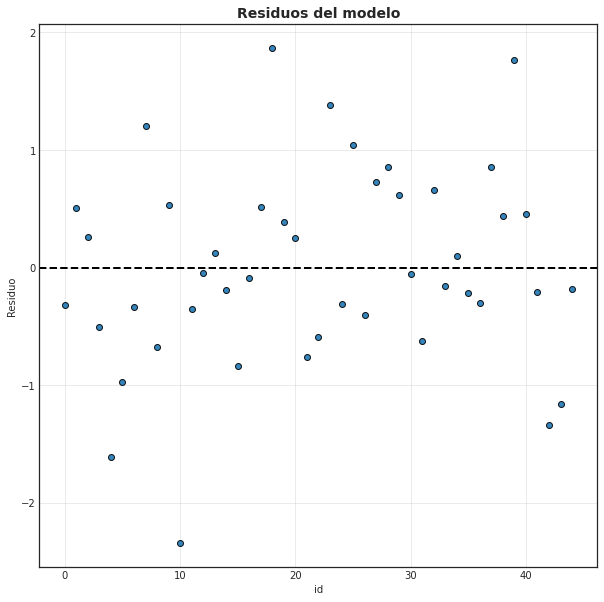

In [19]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(list(range(len(y_train))), residuos_train,
                       edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo', fontsize = 14, fontweight = "bold")
    plt.xlabel('id')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [20]:
med_res = round(np.mean(residuos_train),2)
print(f"La media de los residuos es {med_res}")

La media de los residuos es 0.0


## Homocedasticidad

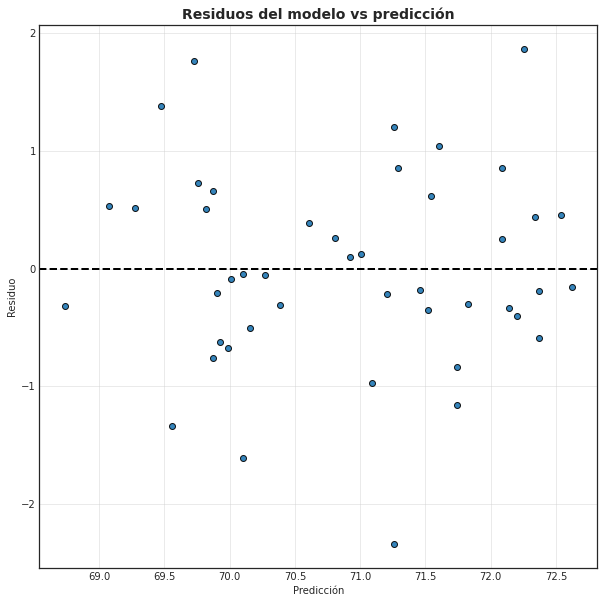

In [21]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_pred, residuos_train, edgecolors=(0, 0, 0), alpha = 0.9)
    plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    plt.title('Residuos del modelo vs predicción', fontsize = 14, fontweight = "bold")
    plt.xlabel('Predicción')
    plt.ylabel('Residuo')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

Test de Breusch-Pagan

$H_0$: La homocedastidad está presente

$H_1$: La heterocedastidad está presente

El p-valor es mayor que 0.05, no se rechaza la hipótesis nula.

## Independencia

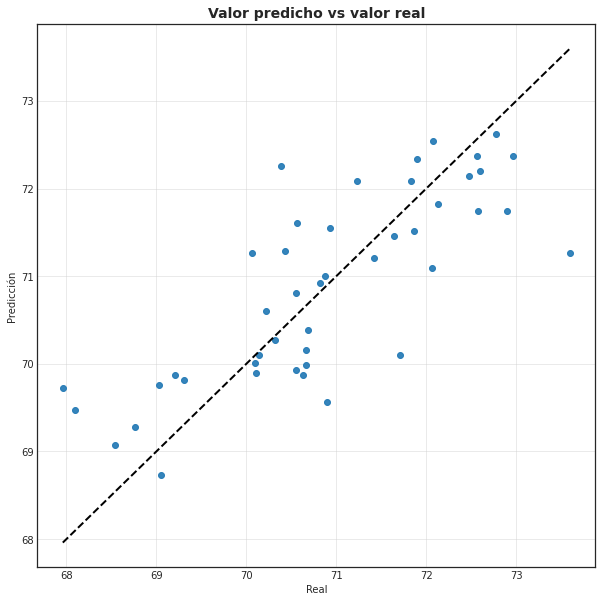

In [22]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, y_pred, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

In [23]:
est_dw = round(durbin_watson(residuos_train),2)

print(f"El resultado del test de Durbin-Watson es: Estadístico = {est_dw}")


El resultado del test de Durbin-Watson es: Estadístico = 1.69


Test de Durbin-Watson

$H_0$: Los residuos son independientes

$H_1$: Los residuos no son independientes

El estadístico se encuentra entre 1.5 y 2.5, no se rechaza la hipótesis nula.

# Modelo y predicciones

Parámetros del modelo

In [24]:
print('Parámetros: \n', [lin_reg.intercept_,lin_reg.coef_])

Parámetros: 
 [73.02042434349109, array([-0.28371963])]


Recta de regresión:

$y =  73.020424 -0.283720*X$

Valor de $R^2$

In [25]:
print('El valor de R^2 es:', round(r2_score(y_train, y_pred),4))

El valor de R^2 es: 0.6207


Estimador de la varianza

In [26]:
y_rest = (y_train - y_pred)**2
yMLE = sum(y_rest)/(len(y_train))
print("El valor por MLE es:", round(yMLE,4))

El valor por MLE es: 0.6918


In [27]:
yOLS = sum(y_rest)/(len(y_train)-2)
print("El valor por OLS es:", round(yOLS,4))

El valor por OLS es: 0.724


Intervalo de confianza con estimadores

In [28]:
den = np.var(X_train)*len(X_train)
sb1 = (yOLS/den)**0.5
amplitud = 1.96*sb1
li = round(lin_reg.coef_[0] - amplitud[0],4)
ls = round(lin_reg.coef_[0] + amplitud[0],4)
print(f'El intervalo de confianza al 0.95 % de b1 es:\n (',li,',',ls,')')

El intervalo de confianza al 0.95 % de b1 es:
 ( -0.35 , -0.2174 )


Predicciones con intervalos de confianza

Gráfica de predicciones y valores reales

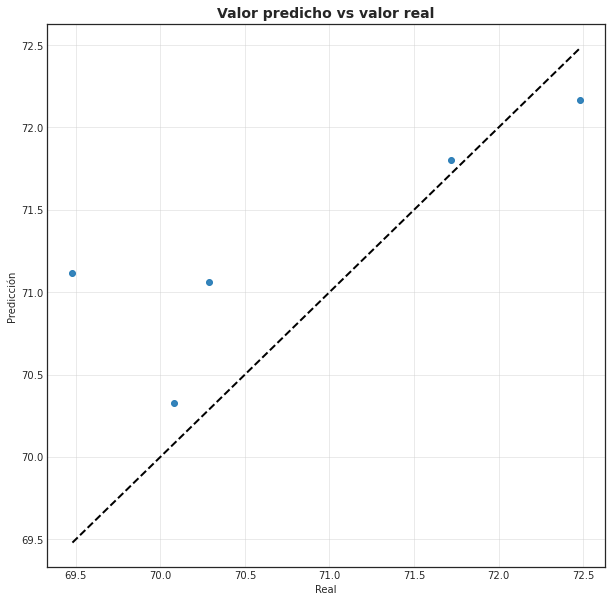

In [29]:
y_pred_test = lin_reg.predict(X_test)

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_test, y_pred_test, alpha = 0.9)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

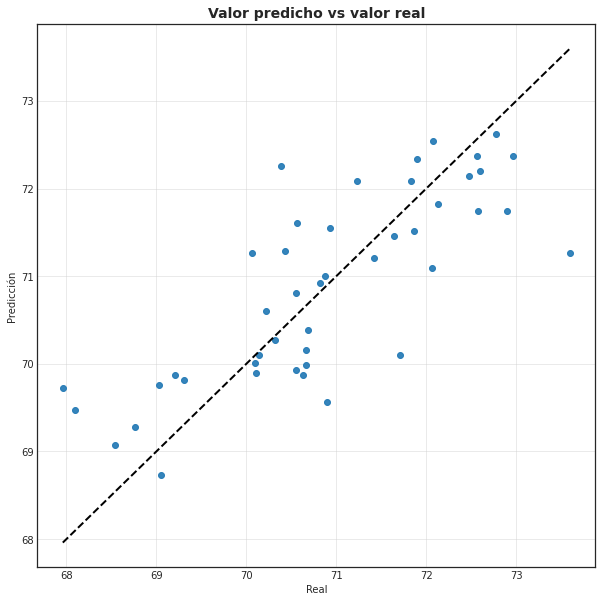

In [30]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(y_train, y_pred, alpha = 0.9)
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'k--', color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

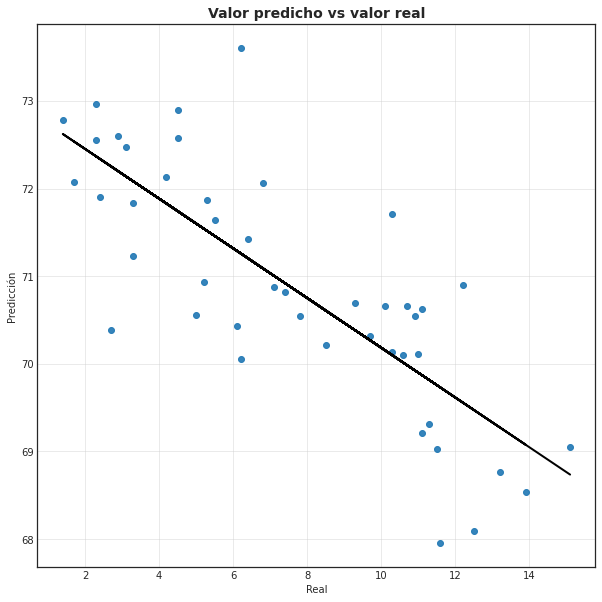

In [31]:
#['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
#'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 
#'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(X_train, y_train, alpha = 0.9)
    plt.plot(X_train, y_pred, color = 'black', lw=2)
    plt.title('Valor predicho vs valor real', fontsize = 14, fontweight = "bold")
    plt.xlabel('Real')
    plt.ylabel('Predicción')
    plt.grid(True, alpha = 0.5)
    plt.tick_params(labelsize = 10)
plt.show()

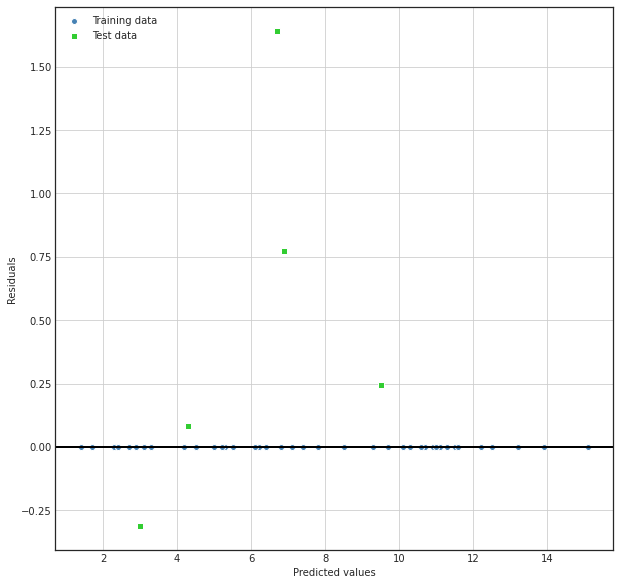

In [32]:
with plt.style.context('seaborn-white'):
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(X_train, y_train - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
    plt.scatter(X_test, y_pred_test - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.axhline(y = 0, linestyle = '-', color = 'black', lw=2)
    plt.grid()
plt.show()

In [33]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_pred),mean_squared_error(y_test, y_pred_test)))

MSE train: 0.692, test: 0.690


In [34]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_pred),r2_score(y_test, y_pred_test)))

R^2 train: 0.621, test: 0.443


# Validación cruzada

In [35]:
from sklearn.model_selection import cross_val_score

#Resultados
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [36]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [0.85243453 0.80715708 1.11063029 0.98203605 0.79081467 0.83288025
 0.55408518 0.22897338 1.10772941 0.95937515]
Mean: 0.8226115985877858
Standard deviation: 0.252016837963892


# Evaluación en el conjunto de prueba

In [37]:
#Midiendo el modelo
y_pred_test = lin_reg.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred_test)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_rmse

0.8317445313454618

Elaborado por Jairo Rojas